Tue Apr  9 03:26:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

100%|██████████| 170498071/170498071 [00:04<00:00, 41934289.28it/s]


Extracting ./cifar-10-python.tar.gz to .
Mean: 0.49139965 0.48215845 0.4465309
Std: 0.20220213 0.19931543 0.20086348


100%|██████████| 170498071/170498071 [00:04<00:00, 37941469.50it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Epoch 1:   0%|          | 0/1563 [00:00<?, ?batch/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 1: 100%|██████████| 1563/1563 [08:36<00:00,  3.02batch/s, loss=1.4886]



[EPOCH: 1]	Train Loss: 1.8649	Train Accuracy: 28.128 %
[EPOCH: 1]	Test Loss: 1.6105	Test Accuracy: 39.99 % 



Epoch 2: 100%|██████████| 1563/1563 [08:35<00:00,  3.03batch/s, loss=1.4984]



[EPOCH: 2]	Train Loss: 1.4936	Train Accuracy: 43.876 %
[EPOCH: 2]	Test Loss: 1.2860	Test Accuracy: 52.31 % 



Epoch 3: 100%|██████████| 1563/1563 [08:38<00:00,  3.01batch/s, loss=1.4104]



[EPOCH: 3]	Train Loss: 1.1474	Train Accuracy: 58.364 %
[EPOCH: 3]	Test Loss: 1.0464	Test Accuracy: 62.5 % 



Epoch 4: 100%|██████████| 1563/1563 [08:38<00:00,  3.01batch/s, loss=0.8918]



[EPOCH: 4]	Train Loss: 0.9191	Train Accuracy: 66.966 %
[EPOCH: 4]	Test Loss: 0.8225	Test Accuracy: 71.0 % 



Epoch 5: 100%|██████████| 1563/1563 [08:39<00:00,  3.01batch/s, loss=0.6693]



[EPOCH: 5]	Train Loss: 0.7727	Train Accuracy: 72.62 %
[EPOCH: 5]	Test Loss: 0.7462	Test Accuracy: 74.26 % 



Epoch 6: 100%|██████████| 1563/1563 [08:39<00:00,  3.01batch/s, loss=0.5884]



[EPOCH: 6]	Train Loss: 0.6645	Train Accuracy: 76.844 %
[EPOCH: 6]	Test Loss: 0.6408	Test Accuracy: 77.99 % 



Epoch 7: 100%|██████████| 1563/1563 [08:39<00:00,  3.01batch/s, loss=0.4210]



[EPOCH: 7]	Train Loss: 0.5751	Train Accuracy: 79.882 %
[EPOCH: 7]	Test Loss: 0.5946	Test Accuracy: 79.59 % 



Epoch 8: 100%|██████████| 1563/1563 [08:39<00:00,  3.01batch/s, loss=0.2035]



[EPOCH: 8]	Train Loss: 0.5050	Train Accuracy: 82.362 %
[EPOCH: 8]	Test Loss: 0.5488	Test Accuracy: 80.91 % 



Epoch 9: 100%|██████████| 1563/1563 [08:39<00:00,  3.01batch/s, loss=0.2105]



[EPOCH: 9]	Train Loss: 0.4456	Train Accuracy: 84.51 %
[EPOCH: 9]	Test Loss: 0.5890	Test Accuracy: 80.07 % 



Epoch 10: 100%|██████████| 1563/1563 [08:39<00:00,  3.01batch/s, loss=0.6067]



[EPOCH: 10]	Train Loss: 0.3904	Train Accuracy: 86.494 %
[EPOCH: 10]	Test Loss: 0.5189	Test Accuracy: 82.83 % 



Epoch 11: 100%|██████████| 1563/1563 [08:39<00:00,  3.01batch/s, loss=0.1409]



[EPOCH: 11]	Train Loss: 0.3400	Train Accuracy: 88.292 %
[EPOCH: 11]	Test Loss: 0.5151	Test Accuracy: 83.3 % 



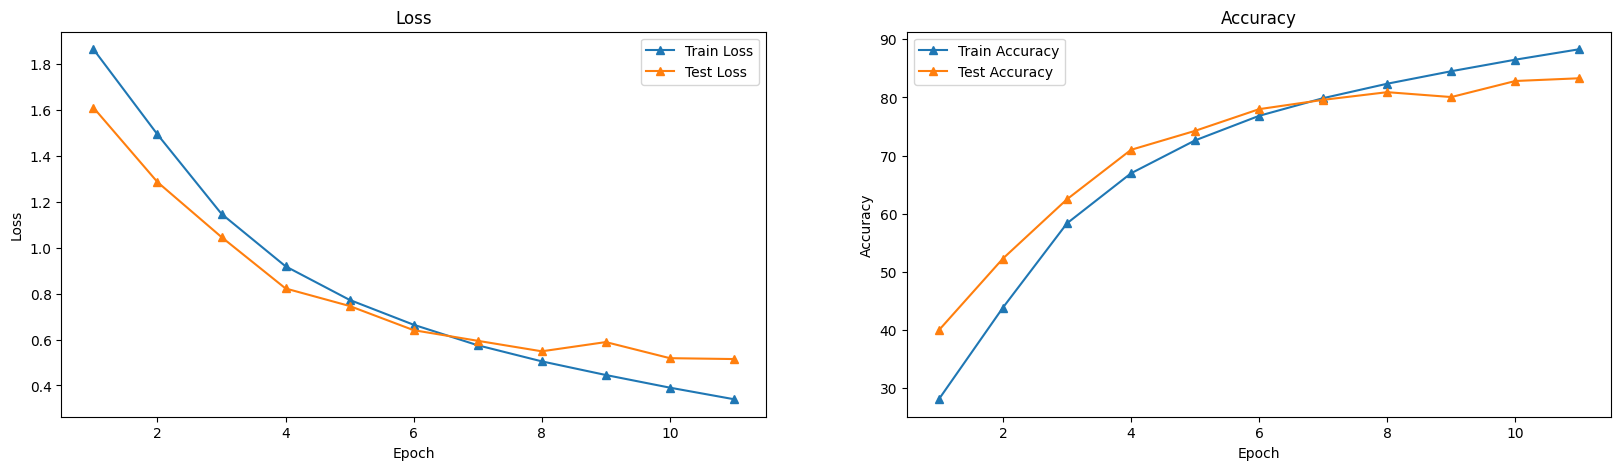

In [ ]:
# -*- coding: utf-8 -*-

!nvidia-smi

import torch
import torch.nn as nn  # 신경망 모듈, 구축 및 훈련에 사용
from torch.utils.data.dataset import Dataset # 사용자 정의 데이터 셋을 만들어 딥러닝을 할 수 있게 함
import torchvision
import torchvision.transforms as transforms # 이미지 전처리에 필요한 transform 사용
from torch.utils.data import DataLoader # 데이터 관리에 필요한 dataloader
import torch.nn.functional as F # loss or cost gradient와 같은 여러 함수를 사용할 수 있음
from sklearn.metrics import f1_score, confusion_matrix # f1 score와 행렬을 계산 -> 모델의 성능 평가
import numpy as np # numpy 사용
import matplotlib.pyplot as plt #시각화를 위한 차트 사용
from torch.cuda import is_available
from torchvision.datasets import CIFAR10

device='cuda' if is_available() else 'cpu'
lr = 1e-4
batch_size=32
epoch = 10

all_data=CIFAR10(root='.',train=True,transform=transforms.ToTensor(),download=True)

meanRGB=[np.mean(x.numpy(),axis=(1,2)) for x,_ in all_data]
stdRGB=[np.std(x.numpy(),axis=(1,2)) for x,_ in all_data]

meanR = np.mean([m[0] for m in meanRGB])
meanG = np.mean([m[1] for m in meanRGB])
meanB = np.mean([m[2] for m in meanRGB])

stdR = np.mean([s[0] for s in stdRGB])
stdG = np.mean([s[1] for s in stdRGB])
stdB = np.mean([s[2] for s in stdRGB])

print('Mean:',meanR, meanG, meanB)
print('Std:',stdR, stdG, stdB)
mean = [meanR, meanG, meanB]
std = [stdR, stdG, stdB]

transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop(227),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])

train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

class Net(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, 64, kernel_size=3, padding=1, stride=1), # conv1
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(64, 64, kernel_size=3, padding=1), # conv2
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),  # conv3
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(128, 128, kernel_size=3, padding=1),  # conv4
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = torch.nn.Sequential(

            torch.nn.Conv2d(128, 128, kernel_size=3, padding=1),  # conv5
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(128, 128, kernel_size=3, padding=1),  # conv6
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, padding=1),  # conv7
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),  # conv8
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),  # conv8
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=3, padding=1),  # conv9
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(512, 512, kernel_size=3, padding=1),  # conv10
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(512, 512, kernel_size=3, padding=1),  # conv10
            torch.nn.ReLU(inplace=True)
        )

        self.avgpool = torch.nn.AdaptiveAvgPool2d((1,1))

        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(512, 4096),  # fc1
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),  # fc2
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, num_classes)  # fc3
        )


    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model = Net(in_channels = 3, num_classes=10).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr)
criterion = nn.CrossEntropyLoss()

from tqdm import tqdm

def train(model, train_loader, optimizer, Epoch):
    model.train()
    losses = []
    correct = 0
    total_samples = len(train_loader.dataset)

    with tqdm(total=len(train_loader), unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {Epoch+1}")
        for batch_idx, (image, label) in enumerate(train_loader):
            image = image.to(device)
            label = label.to(device)
            optimizer.zero_grad()
            output = model(image)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            tepoch.set_postfix(loss=f"{loss.item():.4f}")
            tepoch.update(1)

    train_loss = np.mean(losses)
    accuracy = 100. * correct / total_samples

    return train_loss, accuracy

def evaluate(model, test_loader):
    model.eval()
    losses = []
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device)
            label = label.to(device)
            output = model(image)
            loss = criterion(output, label)
            losses.append(loss.item())

            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss = np.mean(losses)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for Epoch in range(11):
    train_loss, train_accuracy = train(model, trainloader, optimizer, Epoch)
    test_loss, test_accuracy = evaluate(model, testloader)

    # 각 에폭별로 훈련 손실과 정확도, 테스트 손실과 정확도를 저장
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"\n[EPOCH: {Epoch+1}]\tTrain Loss: {train_loss:.4f}\tTrain Accuracy: {train_accuracy} %")
    print(f"[EPOCH: {Epoch+1}]\tTest Loss: {test_loss:.4f}\tTest Accuracy: {test_accuracy} % \n")

plt.figure(figsize=(20, 5))
epochs = range(1, 12)
# 첫 번째 그래프
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
plt.plot(epochs, train_losses, label='Train Loss',marker='^')
plt.plot(epochs, test_losses, label='Test Loss',marker='^')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 두 번째 그래프
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
plt.plot(epochs, train_accuracies, label='Train Accuracy',marker='^')
plt.plot(epochs, test_accuracies, label='Test Accuracy',marker='^')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for Epoch in range(5):
    train_loss, train_accuracy = train(model, trainloader, optimizer, Epoch)
    test_loss, test_accuracy = evaluate(model, testloader)

    # 각 에폭별로 훈련 손실과 정확도, 테스트 손실과 정확도를 저장
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"\n[EPOCH: {Epoch+11}]\tTrain Loss: {train_loss:.4f}\tTrain Accuracy: {train_accuracy} %")
    print(f"[EPOCH: {Epoch+11}]\tTest Loss: {test_loss:.4f}\tTest Accuracy: {test_accuracy} % \n")

Epoch 1: 100%|██████████| 1563/1563 [08:38<00:00,  3.01batch/s, loss=0.3173]



[EPOCH: 11]	Train Loss: 0.2977	Train Accuracy: 89.762 %
[EPOCH: 11]	Test Loss: 0.4942	Test Accuracy: 84.07 % 



Epoch 2: 100%|██████████| 1563/1563 [08:36<00:00,  3.02batch/s, loss=0.4151]



[EPOCH: 12]	Train Loss: 0.2551	Train Accuracy: 91.272 %
[EPOCH: 12]	Test Loss: 0.5306	Test Accuracy: 83.82 % 



Epoch 3: 100%|██████████| 1563/1563 [08:35<00:00,  3.03batch/s, loss=0.0635]



[EPOCH: 13]	Train Loss: 0.2192	Train Accuracy: 92.398 %
[EPOCH: 13]	Test Loss: 0.4688	Test Accuracy: 85.36 % 



Epoch 4: 100%|██████████| 1563/1563 [08:35<00:00,  3.03batch/s, loss=0.0455]



[EPOCH: 14]	Train Loss: 0.1882	Train Accuracy: 93.528 %
[EPOCH: 14]	Test Loss: 0.5308	Test Accuracy: 84.21 % 



Epoch 5: 100%|██████████| 1563/1563 [08:35<00:00,  3.03batch/s, loss=0.0171]



[EPOCH: 15]	Train Loss: 0.1665	Train Accuracy: 94.386 %
[EPOCH: 15]	Test Loss: 0.4958	Test Accuracy: 85.26 % 



In [ ]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for Epoch in range(2):
    train_loss, train_accuracy = train(model, trainloader, optimizer, Epoch)
    test_loss, test_accuracy = evaluate(model, testloader)

    # 각 에폭별로 훈련 손실과 정확도, 테스트 손실과 정확도를 저장
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"\n[EPOCH: {Epoch+11}]\tTrain Loss: {train_loss:.4f}\tTrain Accuracy: {train_accuracy} %")
    print(f"[EPOCH: {Epoch+11}]\tTest Loss: {test_loss:.4f}\tTest Accuracy: {test_accuracy} % \n")

Epoch 1: 100%|██████████| 1563/1563 [08:36<00:00,  3.02batch/s, loss=0.0494]



[EPOCH: 11]	Train Loss: 0.1455	Train Accuracy: 95.036 %
[EPOCH: 11]	Test Loss: 0.5255	Test Accuracy: 85.33 % 



Epoch 2: 100%|██████████| 1563/1563 [08:35<00:00,  3.03batch/s, loss=0.5479]



[EPOCH: 12]	Train Loss: 0.1261	Train Accuracy: 95.764 %
[EPOCH: 12]	Test Loss: 0.5766	Test Accuracy: 84.71 % 

